In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ADA final exam

## Deadline

_Friday, January 19, 2018, at 19:15 CET_


## Important notes

* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will monitor the network for unusual activities.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission

* Make sure you upload your iPython Notebook (1 file) with [this form](https://goo.gl/forms/JKPX74ZH707sB7Up1) at the end of the exam, with all the cells already evaluated (except for the Spark-related question 1.4).
* Complete all the fields in the form, and name your file following the format "NameSurname_sciper.ipynb". The form will be open to submissions until 19:20 (strict deadline). Late submissions will not be accepted.

# Design the Pokedex 2.0

![banner](images/dataset-cover.jpg)

Pokémon are small creatures that fight in competitions. All Pokémon have different numerical characteristics (strength of attack, defense, etc.) and belong to one or two so-called classes (water, fire, etc.).
[Professor Oak](https://www.pojo.com/cartoon/Oak.gif) is the inventor of the [Pokedex](https://en.wikipedia.org/wiki/Gameplay_of_Pok%C3%A9mon#Pok%C3%A9dex), a useful portable device that keeps information about all the Pokémon available. As his lead data scientist, you just received a request from him asking you to update the software on all Pokedex devices. In this exam, you will work toward improving the Pokedex by (1) exploring a dataset of Pokémon and the battles they fight, (2) developing a model for predicting the outcome of battles between Pokémon, and (3) devising a method for ranking Pokémon by their overall strength.

## Dataset description

Professor Oak has dumped the memory of one Pokedex device, resulting in the dataset you’ll work with in this exam.

### [pokemon.csv](pokemon.csv)

In this file, each row represents the features of one Pokémon.

* pid: Numeric - ID of the Pokémon
* HP: Numeric - Health points
* Attack: Numeric - Strength of the regular attack
* Defense: Numeric - Strength of the regular defense
* Sp. Atk: Numeric - Strength of the special attack
* Sp. Def: Numeric - Strength of the special defense
* Speed: Numeric - Moving speed
* Legendary: Boolean - ‘True’ if the Pokémon is rare
* Class 1: Categorical - Pokémon class
* Class 2: Categorical - Pokémon class

Please note that a Pokémon can have either one or two classes. If a Pokémon has two classes, they are both considered to have the same importance.

### [combats.csv](combats.csv)

In this file, each row represents the outcome of one battle between two Pokémon.

* First_pokemon: Numeric - ID (match with pid)
* Second_pokemon: Numeric - ID (match with pid)
* Winner: Numeric - ID of the winner

## Question 1: Exploring the data - 30 points

In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

**1.** (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [2]:
pokemon_df = pd.read_csv('pokemon.csv', index_col='pid')

# All around stats
pokemon_df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [3]:
all_classes = set(pokemon_df['Class 1']).union(set(pokemon_df['Class 2']))
all_classes.remove(np.nan)
print(all_classes)
print(f'There\'s {len(all_classes)} Classes')

{'Psychic', 'Ice', 'Bug', 'Ghost', 'Steel', 'Poison', 'Dark', 'Fighting', 'Dragon', 'Fairy', 'Rock', 'Fire', 'Grass', 'Normal', 'Ground', 'Water', 'Electric', 'Flying'}
There's 18 Classes


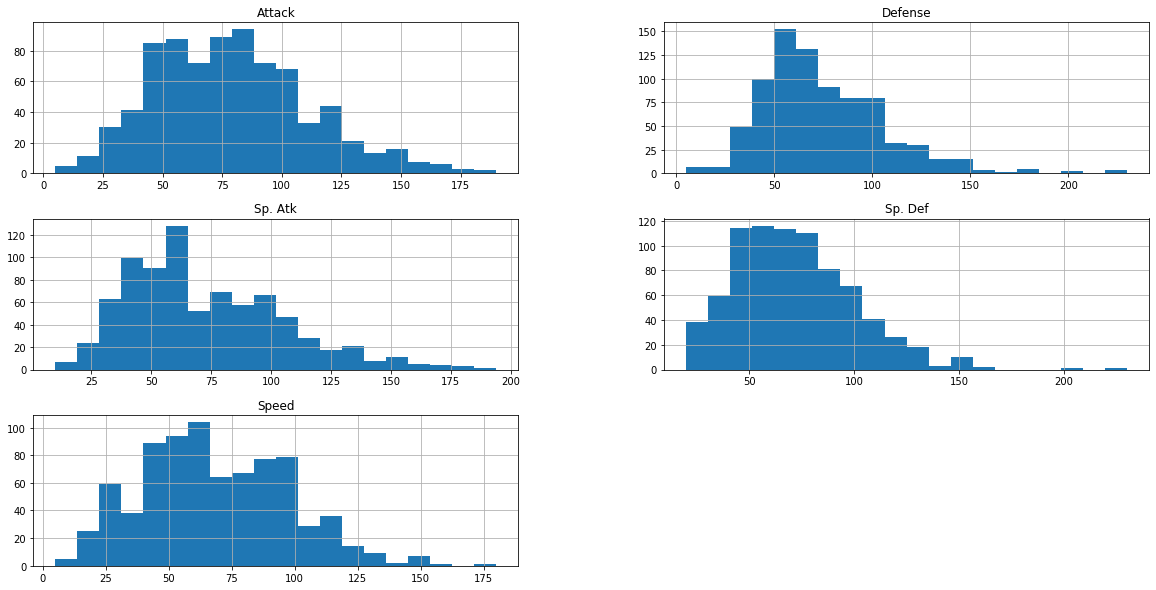

In [4]:
# Other stat distributions
pokemon_df[['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].hist(bins=20, figsize=(20, 10))
plt.show()

In [5]:
print(f"There's {len(pokemon_df)} different pokemons")

There's 800 different pokemons


**2.** (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,

1. visualize the relation between these two variables using an appropriate plot;
2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;
4. list the names of the 10 Pokémon with the largest number of victories.

In [6]:
pokemon_df.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,False


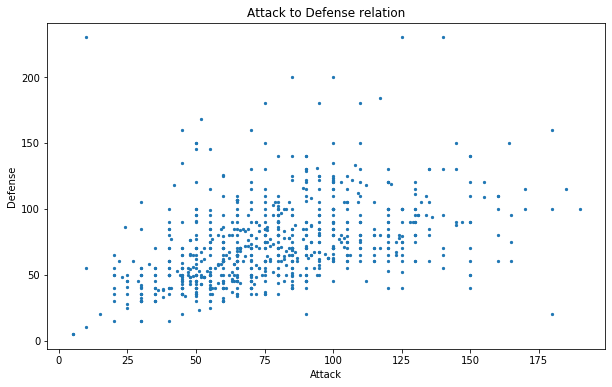

In [7]:
# a
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x='Attack', y='Defense', data=pokemon_df[['Attack', 'Defense']], s=5)
ax.set_title('Attack to Defense relation')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
plt.show()

In [8]:
# b
pokemon_df['AttackDefRatio'] = pokemon_df.Attack / pokemon_df.Defense
print('Top 3 best Attack Def Ratio pokemons', pokemon_df.sort_values('AttackDefRatio', ascending=False).Name[:3].tolist())

# c
print('Worst 3 best Attack Def Ratio pokemons', pokemon_df.sort_values('AttackDefRatio').Name[:3].tolist())

Top 3 best Attack Def Ratio pokemons ['DeoxysAttack Forme', 'Carvanha', 'Mega Beedrill']
Worst 3 best Attack Def Ratio pokemons ['Shuckle', 'Magikarp', 'Bronzor']


In [9]:
# d
combats_df = pd.read_csv('combats.csv')
wins_df = combats_df.groupby('Winner').agg(Wins=('First_pokemon', pd.Series.count))
wins_df.sort_values('Wins', ascending=False)[:10].join(pokemon_df)[['Name', 'Wins']]

,Name,Wins
Winner,,
163,Mewtwo,152
154,Aerodactyl,136
438,Infernape,136
428,Jirachi,134
432,Deoxys Speed Forme,133
314,Slaking,133
214,Murkrow,130
394,Mega Absol,130
249,Mega Houndoom,128


**3.** (10 points) Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.

Note: If there are Pokémon that are in both classes, discard them.

Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In [10]:
pokemon_without_double_df = pokemon_df[~((pokemon_df['Class 1'] == 'Rock') & (pokemon_df['Class 2'] == 'Grass'))] # There's not pokemon Grass, Rock
grass_df = pokemon_without_double_df[(pokemon_df['Class 1'] == 'Grass') | (pokemon_df['Class 2'] == 'Grass')].copy()
rock_df = pokemon_without_double_df[(pokemon_df['Class 1'] == 'Rock') | (pokemon_df['Class 2'] == 'Rock')].copy()

D:\Programmes\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Programmes\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


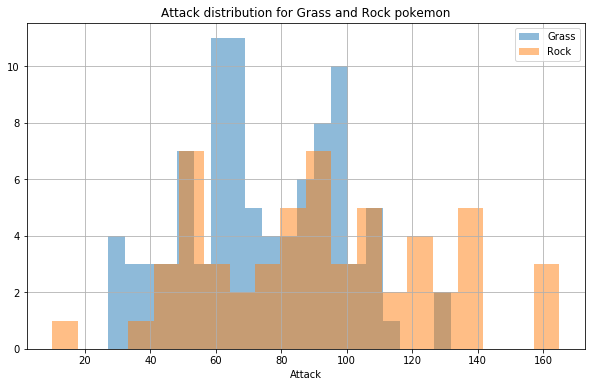

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
grass_df.Attack.hist(bins=20, ax=ax, alpha=0.5)
rock_df.Attack.hist(bins=20, ax=ax, alpha=0.5)
ax.set_title('Attack distribution for Grass and Rock pokemon')
ax.set_xlabel('Attack')
plt.legend(['Grass', 'Rock'])
plt.show()

as we have the assumption that they are normally distributed (which is actually roughly the case), we can run a independent t-test with $\mathcal{H}_0$: both sample comes from the same distribution, $\mathcal{H}_1$: Grass pokemons have a higher attack than Rock (single tailed hypothesis, larger)

In [12]:
from statsmodels.stats.weightstats import ttest_ind
print(ttest_ind(grass_df.Attack, rock_df.Attack, alternative='larger'))
print(ttest_ind(grass_df.Attack, rock_df.Attack, alternative='smaller'))

(-3.729457582692065, 0.9998633330927005, 147.0)
(-3.729457582692065, 0.00013666690729951327, 147.0)


We ran an *independent t-test(t=-3.7, df=147)*, as p $\gg$ 0.1, we can actually say that, because p $\ll$ 0.01 if we use the 'smaller' alternative hypothesis, Rock pokemons have higher attack than grass pokemons

**4.** (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.

In [13]:
import pyspark
from pyspark.sql import SparkSession 
from pyspark.sql.functions import count, desc

# create the session
spark = SparkSession.builder.getOrCreate()

# create the context
sc = spark.sparkContext

In [14]:
pokemon_spark = spark.read.csv('pokemon.csv', header=True)
combats_spark = spark.read.csv('combats.csv', header=True)

In [15]:
top_10 = combats_spark.groupBy('Winner').agg(count('*').alias('Wins'))
top_10.join(pokemon_spark, top_10.Winner == pokemon_spark.pid).select(['Name', 'Wins']).sort(desc('Wins')).limit(10).show()

+------------------+----+
|              Name|Wins|
+------------------+----+
|            Mewtwo| 152|
|        Aerodactyl| 136|
|         Infernape| 136|
|           Jirachi| 134|
|Deoxys Speed Forme| 133|
|           Slaking| 133|
|           Murkrow| 130|
|        Mega Absol| 130|
|     Mega Houndoom| 128|
|   Mega Aerodactyl| 127|
+------------------+----+



## Question 2: Prediction - 40 points

Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

**1.** (3 points) Generate the feature vectors and the labels to train your model.

In [16]:
pokemon_df['Legendary_int'] = pokemon_df.Legendary.astype(int)

In [17]:
pokemon_df['Type'] = True
type_df = (pokemon_df.pivot(columns='Class 1', values='Type') | pokemon_df.pivot(columns='Class 2', values='Type')).drop(columns=np.nan, axis=1).astype(int)

In [19]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary_int']
X = []
y = []
for _, (i, j, winner) in combats_df.iterrows():
    try:
        X.append(np.concatenate([pokemon_df.loc[i][features].to_numpy(),
                                 type_df.loc[i].to_numpy(),
                                 pokemon_df.loc[j][features].to_numpy(),
                                 type_df.loc[j].to_numpy()
                                ]))
        y.append(0 if i==winner else 1)
    except Exception as e:
        print(i, j, winner, e)

X, y = np.array(X), np.array(y)

**2.** (5 points) How does your model handle categorical features and Pokémon with multiple classes?

I decided to one hot encode the type of the pokemon (wheter he is from the typ or not). This naturally handle the case where the pokemon has multiple class.

**3**. (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

In [20]:
np.random.seed(1)
size = len(y)
indices = np.arange(size)
np.random.shuffle(indices)
train_X = X[indices[:int(size*0.9)]]
train_y = y[indices[:int(size*0.9)]]
test_X = X[indices[int(size*0.9):]]
test_y = y[indices[int(size*0.9):]]

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
n_estimators = [10, 25, 50, 100]
max_depth = [2, 4, 10]
classifiers = []
for estimator in n_estimators:
    for depth in max_depth:
        clf = RandomForestClassifier(n_estimators=estimator, max_depth=depth, random_state=1).fit(train_X, train_y)
        classifiers.append((estimator, depth, clf))

**4.** (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?

In [22]:
for (estimator, depth, clf) in classifiers:
    train_pred = clf.predict(train_X)
    test_pred = clf.predict(test_X)
    print(f'Model e={estimator}, d={depth}')
    print(f'Train accuracy={accuracy_score(train_y, train_pred):.4f}, f1 score={f1_score(train_y, train_pred):.4f}')
    print(f'Test accuracy={accuracy_score(test_y, test_pred):.4f}, f1 score={f1_score(test_y, test_pred):.4f}')

Model e=10, d=2
Train accuracy=0.7608, f1 score=0.7781
Test accuracy=0.7656, f1 score=0.7846
Model e=10, d=4
Train accuracy=0.8386, f1 score=0.8509
Test accuracy=0.8378, f1 score=0.8516
Model e=10, d=10
Train accuracy=0.9191, f1 score=0.9228
Test accuracy=0.9078, f1 score=0.9132
Model e=25, d=2
Train accuracy=0.7886, f1 score=0.8084
Test accuracy=0.7948, f1 score=0.8154
Model e=25, d=4
Train accuracy=0.8332, f1 score=0.8470
Test accuracy=0.8338, f1 score=0.8494
Model e=25, d=10
Train accuracy=0.9283, f1 score=0.9318
Test accuracy=0.9152, f1 score=0.9206
Model e=50, d=2
Train accuracy=0.7936, f1 score=0.8165
Test accuracy=0.8030, f1 score=0.8264
Model e=50, d=4
Train accuracy=0.8402, f1 score=0.8532
Test accuracy=0.8430, f1 score=0.8575
Model e=50, d=10
Train accuracy=0.9322, f1 score=0.9355
Test accuracy=0.9194, f1 score=0.9243
Model e=100, d=2
Train accuracy=0.7836, f1 score=0.8073
Test accuracy=0.7878, f1 score=0.8122
Model e=100, d=4
Train accuracy=0.8367, f1 score=0.8492
Test accur

Looking above, the best combination seems to be n_estimators=50 and d=10, with an accuracy of 91.94% and f1-score of 0.9243

**5.** (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).

Indeed, we only use a single train split to train, so we don't know how well it generalize. Especially, some combinaison seem very close. A better idea would be to validate our hyperparameter choice using a validation set, i.e. perform K-fold validation for example

**6.** (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parameters = {'n_estimators':n_estimators, 'max_depth': max_depth}
clf = GridSearchCV(RandomForestClassifier(), parameters, scoring='accuracy', cv=5)
clf.fit(train_X, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [25]:
clf.best_params_, clf.best_score_

({'max_depth': 10, 'n_estimators': 100}, 0.9164888888888889)

In [26]:
list(zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']))

[({'max_depth': 2, 'n_estimators': 10}, 0.7454222222222222),
 ({'max_depth': 2, 'n_estimators': 25}, 0.7912222222222223),
 ({'max_depth': 2, 'n_estimators': 50}, 0.7857777777777778),
 ({'max_depth': 2, 'n_estimators': 100}, 0.7851777777777778),
 ({'max_depth': 4, 'n_estimators': 10}, 0.8179777777777778),
 ({'max_depth': 4, 'n_estimators': 25}, 0.8307333333333333),
 ({'max_depth': 4, 'n_estimators': 50}, 0.8309333333333333),
 ({'max_depth': 4, 'n_estimators': 100}, 0.8350444444444445),
 ({'max_depth': 10, 'n_estimators': 10}, 0.903),
 ({'max_depth': 10, 'n_estimators': 25}, 0.9082666666666667),
 ({'max_depth': 10, 'n_estimators': 50}, 0.9110888888888888),
 ({'max_depth': 10, 'n_estimators': 100}, 0.9164888888888889)]

Analysis is left to the reader, but we don't get the same best hyperparams using K-fold CV

**7.** (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

In [27]:
# retrain model using real best params:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1).fit(train_X, train_y)

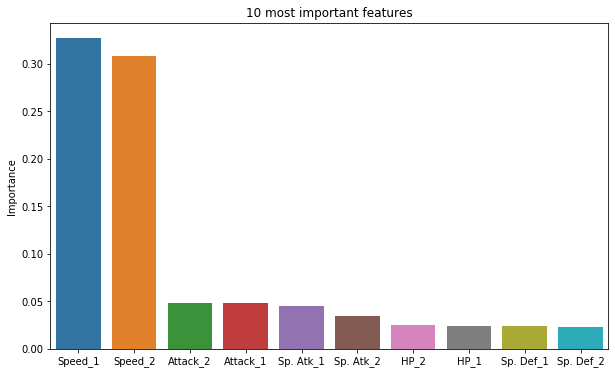

In [28]:
import seaborn as sns

ordering = clf.feature_importances_.argsort()[::-1]
features_all = [x + '_1' for x in features] + [x + '_1' for x in type_df.columns.tolist()]\
               + [x + '_2' for x in features] + [x + '_2' for x in type_df.columns.tolist()]
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=np.array(features_all)[ordering][:10], y=clf.feature_importances_[ordering][:10], ax=ax)
ax.set_title('10 most important features')
ax.set_ylabel('Importance')
plt.show()

## Question 3: Ranking - 30 points

Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.

**1.** (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

In [29]:
total_battle_df = combats_df.First_pokemon.value_counts() + combats_df.Second_pokemon.value_counts()
wins_df['Win_ratio'] = wins_df.Wins / total_battle_df
best_win_ratio_df = wins_df.sort_values('Win_ratio', ascending=False).head(10).join(pokemon_df.Name)
best_win_ratio_df

,Wins,Win_ratio,Name
Winner,,,
155,127,0.984496,Mega Aerodactyl
513,116,0.974790,Weavile
704,121,0.968000,Tornadus Therian Forme
20,115,0.966387,Mega Beedrill
154,136,0.964539,Aerodactyl
477,124,0.961240,Mega Lopunny
727,122,0.960630,Greninja
717,118,0.959350,Meloetta Pirouette Forme
165,119,0.952000,Mega Mewtwo Y


In [30]:
best_win_ratio_df.join(pokemon_df[features])

,Wins,Win_ratio,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary_int
Winner,,,,,,,,,,
155,127,0.984496,Mega Aerodactyl,80,135,85,70,95,150,0
513,116,0.974790,Weavile,70,120,65,45,85,125,0
704,121,0.968000,Tornadus Therian Forme,79,100,80,110,90,121,1
20,115,0.966387,Mega Beedrill,65,150,40,15,80,145,0
154,136,0.964539,Aerodactyl,80,105,65,60,75,130,0
477,124,0.961240,Mega Lopunny,65,136,94,54,96,135,0
727,122,0.960630,Greninja,72,95,67,103,71,122,0
717,118,0.959350,Meloetta Pirouette Forme,100,128,90,77,77,128,0
165,119,0.952000,Mega Mewtwo Y,106,150,70,194,120,140,1


We can see that the most import feature is Speed, conviniently, the top pokemons also have highest speed. Then, they all have relatively high Attack but Sp. Atk, HP and SP.def don't seem to be really important or high (a bit all over the place).

Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.

**2.** (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.

In [31]:
NB_POKEMON = len(pokemon_df)
dominance_adj = np.zeros((NB_POKEMON, NB_POKEMON))

for _, (i, j, winner) in combats_df.iterrows():
    if i == winner:
        dominance_adj[i-1, j-1] += 1 # Pokemon id: 1..800, but array indexing starts at 0
    else:
        dominance_adj[j-1, i-1] += 1

def map_edge(win_i, win_j):
    if win_i == win_j:
        return 0, 0
    if win_i > win_j:
        return 1, 0
    return 0, 1
    
for i in range(NB_POKEMON):
    for j in range(i+1, NB_POKEMON):
        dominance_adj[i, j], dominance_adj[j, i] = map_edge(dominance_adj[i, j], dominance_adj[j, i])

- $G_{i,j} :=$ dominance of pokemon i over pokemon j (pretty clear)
- $G^2_{i,j} := \sum_k G_{i,k} \dot G_{k, j}$ so it's non zero if for some k, $p_i$ dominates $p_k$ who dominates $p_j$.
Basically, taking the sum of a row $i$ of $A$, we get the 'direct' dominance of $i$ + the 'undirect' dominance of $i$ (A bit like a friend of my friend is a friend, plot twisted *à la pokémon*.)

*Note*: This also Katz-centrality limited to 2$^{nd}$ degrees neighbors.

**3** (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.

In [32]:
A = dominance_adj + dominance_adj @ dominance_adj

In [33]:
ranking_indices = A.sum(1).argsort()[::-1] + 1
list(zip(range(1, 11), pokemon_df.Name.loc[ranking_indices], np.sort(A.sum(1))[::-1]))

[(1, 'Mewtwo', 8192.0),
 (2, 'Deoxys Speed Forme', 7885.0),
 (3, 'Aerodactyl', 7531.0),
 (4, 'Jolteon', 7334.0),
 (5, 'Mega Rayquaza', 7075.0),
 (6, 'DeoxysAttack Forme', 7015.0),
 (7, 'Mega Houndoom', 7007.0),
 (8, 'Mega Aerodactyl', 6971.0),
 (9, 'Mega Absol', 6939.0),
 (10, 'Mega Mewtwo X', 6934.0)]

**2.** (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?

In [34]:
pokemon_df[features + ['Name']].loc[ranking_indices].head(10).join(wins_df)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary_int,Name,Wins,Win_ratio
pid,,,,,,,,,,
163,106,110,90,154,90,130,1,Mewtwo,152,0.926829
432,50,95,90,95,90,180,1,Deoxys Speed Forme,133,0.917241
154,80,105,65,60,75,130,0,Aerodactyl,136,0.964539
147,65,65,60,110,95,130,0,Jolteon,124,0.925373
427,105,180,100,180,100,115,1,Mega Rayquaza,127,0.947761
430,50,180,20,180,20,150,1,DeoxysAttack Forme,121,0.902985
249,75,90,90,140,90,115,0,Mega Houndoom,128,0.948148
155,80,135,85,70,95,150,0,Mega Aerodactyl,127,0.984496
394,65,150,60,115,60,115,0,Mega Absol,130,0.935252


In [35]:
wins_df.sort_values('Wins', ascending=False).head(15)

,Wins,Win_ratio
Winner,,
163,152,0.926829
154,136,0.964539
438,136,0.912752
428,134,0.875817
432,133,0.917241
314,133,0.886667
214,130,0.822785
394,130,0.935252
249,128,0.948148


Our top 10 changed quite a bit. Explanation can't only find roots in the features. But we note that now, in our top 10, we have pokemon who have won the most fights. A possible explanation is that our scoring is based on Katz-centrality and the more win you have, the higher the probability of having seen many different pokemons (high out-degree). As the out-degree increase, the number of path of length 2 ($G^2$) will also increase. One should note that top 10 pokemon do have high win percentage.

**3.** (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.

A big counter example to winning ratio is that, a newcomer with 1 win, 0 loss would have a perfect ratio ending up at the top of the leaderboard with no reason. On the other hand, as stated previously dominance score is based on Katz-centrality, a quite robust measure, that is perfect to identify important (aka dominant) nodes in the network.